In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
index = pd.read_csv("index.csv", index_col=[0, 1])

index.dropna(inplace=True)
index.drop(index[index["housing"] == 0].index, inplace=True)


In [3]:
biking = pd.read_csv("biking/biking.csv", index_col=0)
housing = pd.read_csv("housing/housing.csv", index_col=0)
vegan = pd.read_csv("vegan/vegan.csv", index_col=[0, 1])
weather = pd.read_csv("weather/weather.csv", index_col=[0])

data = pd.DataFrame(index=index.index)
data["biking"] = biking.loc[index["biking"], "per_100k"].values
data["housing"] = housing.loc[index["housing"], "zhvi"].values
data["vegan"] = vegan["per_100k"]
data["winter"] = weather.loc[index["weather"].astype("str"), "winter"].values
data["summer"] = weather.loc[index["weather"].astype("str"), "summer"].values



In [4]:
print(data.to_string())
data.to_csv("data.csv")

                                            biking    housing      vegan    winter    summer
City             State                                                                      
New York         New York               616.357533   752941.0   3.396110  0.039583  0.513587
Los Angeles      California             398.965288   794987.0   5.386346  0.700694  0.548234
Chicago          Illinois               754.626952   297669.0   2.475979  0.056250  0.516984
Houston          Texas                  204.604974   179002.0   1.345147  0.567361  0.069973
Phoenix          Arizona                279.964931   321587.0   0.373102  0.570833  0.044158
Philadelphia     Pennsylvania           909.814604   246927.0   3.055250  0.240972  0.154891
San Antonio      Texas                   99.075751   184429.0   1.254683  0.516667  0.198370
San Diego        California             437.172377   718477.0   4.902908  0.702083  0.454484
Dallas           Texas                   91.422016   241651.0   1.6099

In [5]:
chicago = data.loc[("Chicago", "Illinois")]

weights = {
    "biking": 1,
    "housing": -1,
    "vegan": 1,
    "winter": 1,
    "summer": 0,
}

# scores = data.apply(lambda row: sum(row * weights.values()), axis=1)
scores = data
scores = scores.apply(lambda x: (x/chicago).apply(np.log2), axis=1)
scores *= weights

In [6]:
chicago = scores.loc[("Chicago", "Illinois")]

# scores.clip(-3.322, 3.322, inplace=True)
# scores.drop(scores[scores["biking"] < 0].index, inplace=True)
# scores.drop(scores[scores["housing"] < 0].index, inplace=True)
# scores.drop(scores[scores["vegan"] < 0].index, inplace=True)
# scores.drop(scores[scores["winter"] < 0].index, inplace=True)
# scores.drop(scores[scores["summer"] < 0].index, inplace=True)

scores["total"] = scores[["biking", "housing", "vegan", "winter", "summer"]].mean(axis=1)
scores.sort_values("total", ascending=False, inplace=True)


In [7]:
print(scores.to_string())
scores.to_csv("scores.csv")

                                         biking   housing     vegan    winter  summer     total
City             State                                                                         
Berkeley         California            2.142016 -2.166879  2.770248  3.772590     0.0  1.303595
Gainesville      Florida               1.117079  0.854543  0.780399  3.384664    -0.0  1.227337
Tempe            Arizona               1.329176 -0.184675  1.161235  3.508773    -0.0  1.162902
Portland         Oregon                1.999723 -0.720326  2.868659  1.473931     0.0  1.124397
New Orleans      Louisiana             0.739080  0.053609  1.451345  3.197368    -0.0  1.088280
Hollywood        Florida              -0.717470 -0.222100  2.601399  3.434937    -0.0  1.019353
Boulder          Colorado              2.702441 -1.017822  0.899562  2.222392    -0.0  0.961315
Cambridge        Massachusetts         2.433792 -1.559463  1.255650  2.648835    -0.0  0.955763
Orlando          Florida              -1

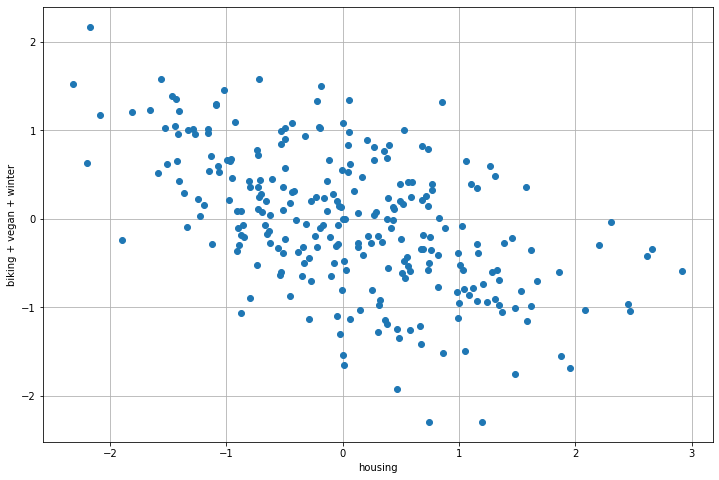

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(scores["housing"], scores[["biking", "vegan", "winter", "summer"]].mean(axis=1), "o")
ax.set_xlabel("housing")
ax.set_ylabel("biking + vegan + winter")
ax.grid()

In [9]:
scores.corr()

,biking,housing,vegan,winter,summer,total
biking,1.000000,-0.295995,0.437324,-0.051401,NaN,0.647957
housing,-0.295995,1.000000,-0.448365,-0.319930,NaN,-0.262938
vegan,0.437324,-0.448365,1.000000,0.256430,NaN,0.719796
winter,-0.051401,-0.319930,0.256430,1.000000,NaN,0.582044
summer,NaN,NaN,NaN,NaN,NaN,NaN
total,0.647957,-0.262938,0.719796,0.582044,NaN,1.000000
